### Data extraction, transformation and loading

In [114]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('Input/bank-additional-full.csv',  sep=';')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [117]:
df.head(200)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [118]:
len(df[df.pdays == 999]) / len(df)


0.9632174419733903

In [119]:
# Hot one encode job category 
onehot_encoder = OneHotEncoder(sparse=False)
job_catArray = np.array(df['job'])
label_encoder = LabelEncoder()
job_cat_integer_encoded = label_encoder.fit_transform(job_catArray)
job_cat_onehot_encoder = OneHotEncoder(sparse=False)
job_cat_integer_encoded = job_cat_integer_encoded.reshape(len(job_cat_integer_encoded), 1)
job_cat_onehot_encoded = onehot_encoder.fit_transform(job_cat_integer_encoded)
Job_Cat_Columns = set(df['job'])
Job_Cat_Columns = list(Job_Cat_Columns)
dfJobCat = pd.DataFrame(data=job_cat_onehot_encoded, columns=Job_Cat_Columns)

df = pd.concat([df, dfJobCat], axis=1, join='inner')

In [120]:
df = df.rename(columns={'unknown':'unknown_profession'})

In [121]:
# Hot one encode marital category 
onehot_encoder = OneHotEncoder(sparse=False)
marital_catArray = np.array(df['marital'])
label_encoder = LabelEncoder()
marital_cat_integer_encoded = label_encoder.fit_transform(marital_catArray)
marital_cat_onehot_encoder = OneHotEncoder(sparse=False)
marital_cat_integer_encoded = marital_cat_integer_encoded.reshape(len(marital_cat_integer_encoded), 1)
marital_cat_onehot_encoded = onehot_encoder.fit_transform(marital_cat_integer_encoded)
marital_Cat_Columns = set(df['marital'])
marital_Cat_Columns = list(marital_Cat_Columns)
dfmaritalCat = pd.DataFrame(data=marital_cat_onehot_encoded, columns=marital_Cat_Columns)

df = pd.concat([df, dfmaritalCat], axis=1, join='inner')

In [122]:
df = df.rename(columns={'unknown':'unknown_marital_status'})

In [123]:
# Hot one encode education category 
onehot_encoder = OneHotEncoder(sparse=False)
education_catArray = np.array(df['education'])
label_encoder = LabelEncoder()
education_cat_integer_encoded = label_encoder.fit_transform(education_catArray)
education_cat_onehot_encoder = OneHotEncoder(sparse=False)
education_cat_integer_encoded = education_cat_integer_encoded.reshape(len(education_cat_integer_encoded), 1)
education_cat_onehot_encoded = onehot_encoder.fit_transform(education_cat_integer_encoded)
education_Cat_Columns = set(df['education'])
education_Cat_Columns = list(education_Cat_Columns)
dfeducationCat = pd.DataFrame(data=education_cat_onehot_encoded, columns=education_Cat_Columns)

df = pd.concat([df, dfeducationCat], axis=1, join='inner')

In [124]:
df = df.rename(columns={'unknown':'unknown_education'})

In [125]:
# Hot one encode default category 
onehot_encoder = OneHotEncoder(sparse=False)
default_catArray = np.array(df['default'])
label_encoder = LabelEncoder()
default_cat_integer_encoded = label_encoder.fit_transform(default_catArray)
default_cat_onehot_encoder = OneHotEncoder(sparse=False)
default_cat_integer_encoded = default_cat_integer_encoded.reshape(len(default_cat_integer_encoded), 1)
default_cat_onehot_encoded = onehot_encoder.fit_transform(default_cat_integer_encoded)
default_Cat_Columns = set(df['default'])
default_Cat_Columns = list(default_Cat_Columns)
dfdefaultCat = pd.DataFrame(data=default_cat_onehot_encoded, columns=default_Cat_Columns)

df = pd.concat([df, dfdefaultCat], axis=1, join='inner')

In [126]:
df = df.rename(columns={'unknown':'unknown_default', 'yes':'yes_default','no':'no_default'})

In [127]:
# Hot one encode housing category 
onehot_encoder = OneHotEncoder(sparse=False)
housing_catArray = np.array(df['housing'])
label_encoder = LabelEncoder()
housing_cat_integer_encoded = label_encoder.fit_transform(housing_catArray)
housing_cat_onehot_encoder = OneHotEncoder(sparse=False)
housing_cat_integer_encoded = housing_cat_integer_encoded.reshape(len(housing_cat_integer_encoded), 1)
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat_integer_encoded)
housing_Cat_Columns = set(df['housing'])
housing_Cat_Columns = list(housing_Cat_Columns)
dfhousingCat = pd.DataFrame(data=housing_cat_onehot_encoded, columns=housing_Cat_Columns)

df = pd.concat([df, dfhousingCat], axis=1, join='inner')

In [128]:
df = df.rename(columns={'unknown':'unknown_housing', 'yes':'yes_housing','no':'no_housing'})

In [129]:
# Hot one encode loan category 
onehot_encoder = OneHotEncoder(sparse=False)
loan_catArray = np.array(df['loan'])
label_encoder = LabelEncoder()
loan_cat_integer_encoded = label_encoder.fit_transform(loan_catArray)
loan_cat_onehot_encoder = OneHotEncoder(sparse=False)
loan_cat_integer_encoded = loan_cat_integer_encoded.reshape(len(loan_cat_integer_encoded), 1)
loan_cat_onehot_encoded = onehot_encoder.fit_transform(loan_cat_integer_encoded)
loan_Cat_Columns = set(df['loan'])
loan_Cat_Columns = list(loan_Cat_Columns)
dfloanCat = pd.DataFrame(data=loan_cat_onehot_encoded, columns=loan_Cat_Columns)

df = pd.concat([df, dfloanCat], axis=1, join='inner')

In [130]:
df = df.rename(columns={'unknown':'unknown_loan', 'yes':'yes_loan','no':'no_loan'})

In [131]:
# Hot one encode contact category 
onehot_encoder = OneHotEncoder(sparse=False)
contact_catArray = np.array(df['contact'])
label_encoder = LabelEncoder()
contact_cat_integer_encoded = label_encoder.fit_transform(contact_catArray)
contact_cat_onehot_encoder = OneHotEncoder(sparse=False)
contact_cat_integer_encoded = contact_cat_integer_encoded.reshape(len(contact_cat_integer_encoded), 1)
contact_cat_onehot_encoded = onehot_encoder.fit_transform(contact_cat_integer_encoded)
contact_Cat_Columns = set(df['contact'])
contact_Cat_Columns = list(contact_Cat_Columns)
dfcontactCat = pd.DataFrame(data=contact_cat_onehot_encoded, columns=contact_Cat_Columns)

df = pd.concat([df, dfcontactCat], axis=1, join='inner')

In [132]:
# Hot one encode month category 
onehot_encoder = OneHotEncoder(sparse=False)
month_catArray = np.array(df['month'])
label_encoder = LabelEncoder()
month_cat_integer_encoded = label_encoder.fit_transform(month_catArray)
month_cat_onehot_encoder = OneHotEncoder(sparse=False)
month_cat_integer_encoded = month_cat_integer_encoded.reshape(len(month_cat_integer_encoded), 1)
month_cat_onehot_encoded = onehot_encoder.fit_transform(month_cat_integer_encoded)
month_Cat_Columns = set(df['month'])
month_Cat_Columns = list(month_Cat_Columns)
dfmonthCat = pd.DataFrame(data=month_cat_onehot_encoded, columns=month_Cat_Columns)

df = pd.concat([df, dfmonthCat], axis=1, join='inner')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 66 columns):
age                       41188 non-null int64
job                       41188 non-null object
marital                   41188 non-null object
education                 41188 non-null object
default                   41188 non-null object
housing                   41188 non-null object
loan                      41188 non-null object
contact                   41188 non-null object
month                     41188 non-null object
day_of_week               41188 non-null object
duration                  41188 non-null int64
campaign                  41188 non-null int64
pdays                     41188 non-null int64
previous                  41188 non-null int64
poutcome                  41188 non-null object
emp.var.rate              41188 non-null float64
cons.price.idx            41188 non-null float64
cons.conf.idx             41188 non-null float64
euribor3m                 411

In [134]:
# Hot one encode day_of_week category 
onehot_encoder = OneHotEncoder(sparse=False)
day_of_week_catArray = np.array(df['day_of_week'])
label_encoder = LabelEncoder()
day_of_week_cat_integer_encoded = label_encoder.fit_transform(day_of_week_catArray)
day_of_week_cat_onehot_encoder = OneHotEncoder(sparse=False)
day_of_week_cat_integer_encoded = day_of_week_cat_integer_encoded.reshape(len(day_of_week_cat_integer_encoded), 1)
day_of_week_cat_onehot_encoded = onehot_encoder.fit_transform(day_of_week_cat_integer_encoded)
day_of_week_Cat_Columns = set(df['day_of_week'])
day_of_week_Cat_Columns = list(day_of_week_Cat_Columns)
dfday_of_weekCat = pd.DataFrame(data=day_of_week_cat_onehot_encoded, columns=day_of_week_Cat_Columns)

df = pd.concat([df, dfday_of_weekCat], axis=1, join='inner')

In [135]:
# Hot one encode poutcome category 
onehot_encoder = OneHotEncoder(sparse=False)
poutcome_catArray = np.array(df['poutcome'])
label_encoder = LabelEncoder()
poutcome_cat_integer_encoded = label_encoder.fit_transform(poutcome_catArray)
poutcome_cat_onehot_encoder = OneHotEncoder(sparse=False)
poutcome_cat_integer_encoded = poutcome_cat_integer_encoded.reshape(len(poutcome_cat_integer_encoded), 1)
poutcome_cat_onehot_encoded = onehot_encoder.fit_transform(poutcome_cat_integer_encoded)
poutcome_Cat_Columns = set(df['poutcome'])
poutcome_Cat_Columns = list(poutcome_Cat_Columns)
dfpoutcomeCat = pd.DataFrame(data=poutcome_cat_onehot_encoded, columns=poutcome_Cat_Columns)

df = pd.concat([df, dfpoutcomeCat], axis=1, join='inner')

In [136]:
df = df.rename(columns={'failure':'previous_campaign_failure', 'nonexistent':'previous_campaign_nonexistent','success':'previous_campaign_success'})

In [137]:
# Hot one encode y in a single column
df.loc[df.y == 'yes', 'y'] = '1'
df.loc[df.y == 'no', 'y'] = '0'

In [138]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'entrepreneur',
       'blue-collar', 'services', 'management', 'unemployed', 'student',
       'self-employed', 'housemaid', 'admin.', 'technician', 'retired',
       'unknown_profession', 'divorced', 'married', 'single',
       'unknown_marital_status', 'illiterate', 'basic.6y', 'university.degree',
       'basic.4y', 'basic.9y', 'high.school', 'unknown_education',
       'professional.course', 'yes_default', 'unknown_default', 'no_default',
       'yes_housing', 'unknown_housing', 'no_housing', 'yes_loan',
       'unknown_loan', 'no_loan', 'telephone', 'cellular', 'oct', 'jul', 'jun',
       'mar', 'nov', 'dec', 'apr', 'aug', 'may', 'sep', 'mon', 'tue', 'fri',
       'thu', 'wed', 'previous_campaign_failure',
      

In [83]:
#df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
#       'contact', 'month', 'day_of_week','poutcome'],axis=1, inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx 

In [142]:
df.iloc[:, 21:] = df.iloc[:,21:].astype(int)

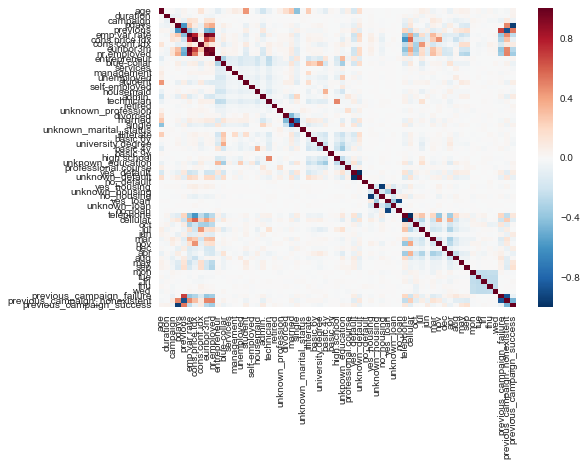

In [143]:
plt.gcf().clear()
corr = df.iloc[:,:].corr()
sns.heatmap(corr)
plt.show()

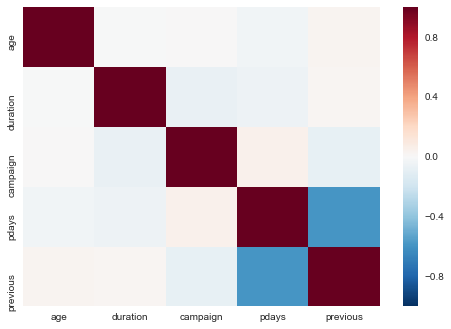

In [144]:
plt.gcf().clear()
corr = df.iloc[:,:15].corr()
sns.heatmap(corr)
plt.show()

In [145]:
corr
# Highly correlated features
# cons.price.idx, emp.var.rate
# euribor3m, emp.var.rate, nr.employed

# drop emp.var.rate, and euribor3m

,age,duration,campaign,pdays,previous
age,1.000000,-0.000866,0.004594,-0.034369,0.024365
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000


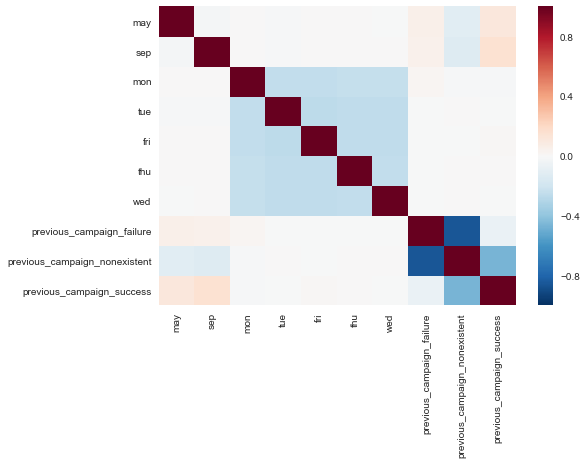

In [146]:
plt.gcf().clear()
corr = df.iloc[:,-10:].corr()
sns.heatmap(corr)
plt.show()

In [147]:
corr
# Highly correlated
# previous_campaign_failure, previous_campaign_nonexistent

# drop previous_campaign_nonexistent

,may,sep,mon,tue,fri,thu,wed,previous_campaign_failure,previous_campaign_nonexistent,previous_campaign_success
may,1.000000,-0.015779,0.002628,-0.008896,0.005782,0.003723,-0.003166,0.057238,-0.111258,0.115812
sep,-0.015779,1.000000,0.003540,-0.014280,0.001362,0.003161,0.006491,0.053385,-0.125375,0.149349
mon,0.002628,0.003540,1.000000,-0.247254,-0.249248,-0.239470,-0.240280,0.019320,-0.009925,-0.013760
tue,-0.008896,-0.014280,-0.247254,1.000000,-0.262675,-0.252371,-0.253225,-0.001169,0.002226,-0.002276
fri,0.005782,0.001362,-0.249248,-0.262675,1.000000,-0.254406,-0.255266,-0.004548,-0.000585,0.008827
thu,0.003723,0.003161,-0.239470,-0.252371,-0.254406,1.000000,-0.245253,-0.006058,0.001574,0.007258
wed,-0.003166,0.006491,-0.240280,-0.253225,-0.255266,-0.245253,1.000000,-0.007157,0.006545,-0.000390
previous_campaign_failure,0.057238,0.053385,0.019320,-0.001169,-0.004548,-0.006058,-0.007157,1.000000,-0.853119,-0.063006
previous_campaign_nonexistent,-0.111258,-0.125375,-0.009925,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928
previous_campaign_success,0.115812,0.149349,-0.013760,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000


In [156]:
corrTestY = df.y
corrTestDf = df.drop(['duration', 'y', 'job', 'marital', 'education', 'default', 'housing', 'loan',
      'contact', 'month', 'day_of_week','poutcome'], axis=1)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx 

In [158]:
len(corrTestDf.columns)

62

In [159]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-1, oob_score= True, random_state = 0, max_features=62)

rfr.fit(corrTestDf,corrTestY)
 
importance = list(rfr.feature_importances_)
feature = list(corrTestDf.columns)

feature_importance = pd.DataFrame({'Feature': feature, 'Importance': importance})

print('Feature importance determined from random forest')
print(feature_importance.sort_values('Importance', ascending=False))

Feature importance determined from random forest
                          Feature  Importance
8                     nr.employed    0.160644
0                             age    0.154789
7                       euribor3m    0.091026
1                        campaign    0.078831
2                           pdays    0.029000
36                    yes_housing    0.024060
6                   cons.conf.idx    0.022454
38                     no_housing    0.021371
9                    entrepreneur    0.018069
28                       basic.4y    0.016146
41                        no_loan    0.015957
22                        married    0.015869
31              unknown_education    0.015749
58                            wed    0.014701
18                     technician    0.014419
23                         single    0.014337
55                            tue    0.014192
54                            mon    0.013981
39                       yes_loan    0.013718
57                            t

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [160]:
feature_importance.sort_values('Importance', ascending=False)[10:45]

,Feature,Importance
41,no_loan,0.015957
22,married,0.015869
31,unknown_education,0.015749
58,wed,0.014701
18,technician,0.014419
23,single,0.014337
55,tue,0.014192
54,mon,0.013981
39,yes_loan,0.013718
57,thu,0.012928


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx 

In [161]:
df.to_csv('Hold/df.csv', index=False)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
age                              41188 non-null int64
job                              41188 non-null object
marital                          41188 non-null object
education                        41188 non-null object
default                          41188 non-null object
housing                          41188 non-null object
loan                             41188 non-null object
contact                          41188 non-null object
month                            41188 non-null object
day_of_week                      41188 non-null object
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
poutcome                         41188 non-null object
emp.var.rate                     41188 non-null float64
cons.price.idx 